# Analysis of senescence patterns in septoria data from Grignon on Tremie 2012/13

* data_plant comes from the data set of plant architecture measurements. The necrosis measured is a mix of apical senescence and disease symptoms without distinction. [Reshape of file 'Tremie12_suivis_plantes_baguees.txt' (tagged) and 'Tremie12_suivis_plantes_baguees_reference_maladie.txt' (ref_tagged) in 'disease_measurements/tremie_2012_nec.csv']
* data_disease comes from the data set of disease measurements (reference treatment with less disease). Apical senescence and necrosis caused by septoria were noted separately [in 'disease_measurements/tremie_2012_ref.csv']

In [1]:
# Author: G. Garin
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pylab import savefig
from alinea.echap.disease.septo_data_reader import *
from alinea.echap.disease.septo_data_treatment import *
data_plant, weather = data_reader(year = 2012, variety = 'Tremie12', from_file = 'senescence')
data_disease, weather = data_reader(year = 2012, variety = 'Tremie12', from_file = 'reference')

## Number of notations

There are more notations in data_plants than data_disease. It contains another data set with 4 notation dates on other tagged plants.

In [2]:
# Number of notations in data_plant
table_count_notations(data_plant, weather, variable = 'necro')

Leaf number             1   2   3   4   5   6   7   8   9   10  11  12  13
Date       Degree days                                                    
2012-04-02 1158          -   -   -  10  29  29  30  30  30  30  30  30  19
2012-04-11 1237          1  21  53  59  59  57  56  60  60  60  60  57  19
2012-04-26 1351          -  22  30  30  30  28  30  30  30  30  30  27   -
2012-05-03 1435         23  30  30  30  30  25  30  30  30  30  30  27   -
2012-05-09 1512         59  60  60  60  60  55  60  60  60  60  60  57  19
2012-05-16 1608         30  30  30  30  30  17  30  30  30  30  30  27   -
2012-05-25 1736         30  30  30  30  30  30  30  30  30  30  30  27   -
2012-05-31 1848         30  30  30  30  30  30  30  30  30  30  30  27   -
2012-06-12 2029         60  60  60  60  60  60  60  60  60  60  60  57  19

In [3]:
# Number of notations in data_disease
table_count_notations(data_disease, weather, variable = 'necro')

Leaf number              1   2   3   4   5   6   7
Date       Degree days                            
2012-04-03 1167          -   -   -   3  29  28  27
2012-04-11 1237          -   -  23  30  29  25  25
2012-04-26 1351          -  22  30  29  30  25  12
2012-05-03 1435         23  30  30  26  29  16   -
2012-05-09 1512         30  30  27  24  25  24   -
2012-05-16 1608         30  30  30  27  29  14   -
2012-05-25 1736         30  30  28  25  30  27   -
2012-05-31 1848         30  30  30  22   -   -   -
2012-06-12 2029         30  30  30  26   -   -   -

## Curves for individual samples by leaf layer

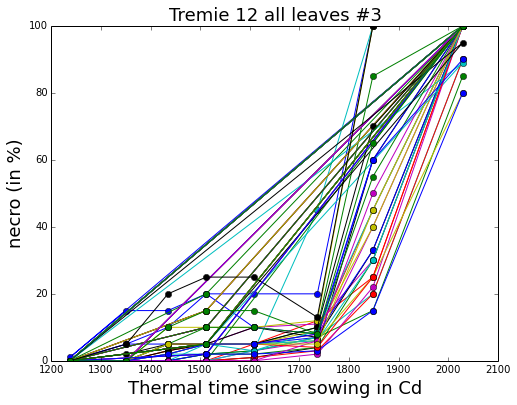

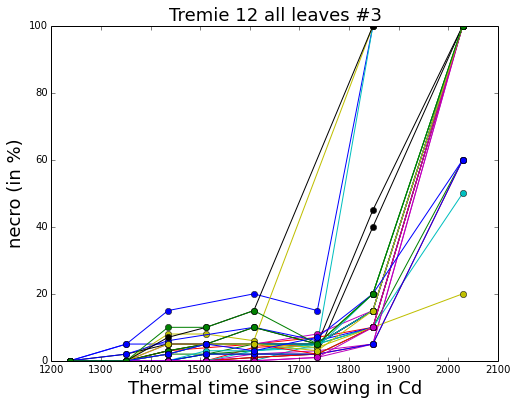

In [4]:
# data_plant above and data_disease below
leaf = 3
plot_by_leaf_sample(data_plant, weather, variable = 'necro', leaf = leaf, xaxis = 'degree_days', marker = 'o')
plot_by_leaf_sample(data_disease, weather, variable = 'necro', leaf = leaf, xaxis = 'degree_days', marker = 'o')

## Difference of notation in data_plant vs. data_disease

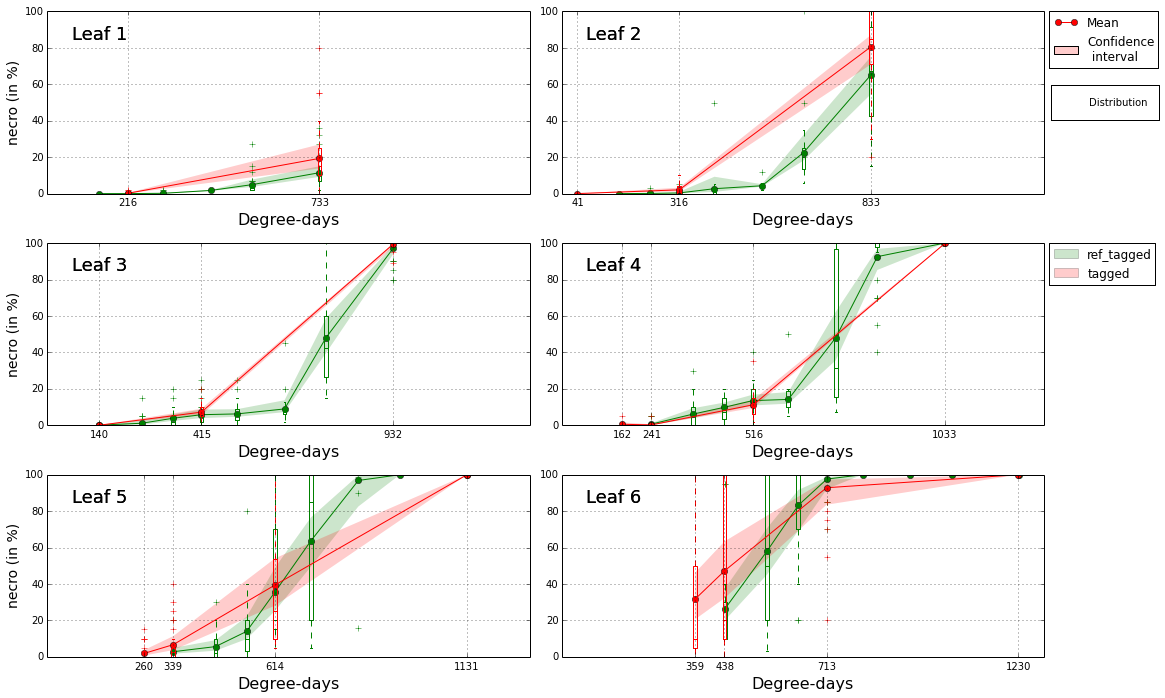

In [5]:
warnings.filterwarnings('ignore')
# Leaf by leaf in data_plant with tagged and ref_tagged plants separated
data_ref_tagged = data_plant[data_plant['data_set'] == 'ref_tagged']
data_tagged = data_plant[data_plant['data_set'] == 'tagged']
compare_confidence_and_boxplot_two_datasets(data_ref_tagged, data_tagged, weather, variable = 'necro', xaxis = 'age_leaf',
                                            leaves=range(1,7), fig_size=(15, 10), labels = ['ref_tagged', 'tagged'], xlims = [0,1300])

There is no significant difference in data from different origins (tagged & ref_tagged) in data_plant.

--> All data in data_plant measure the same variable

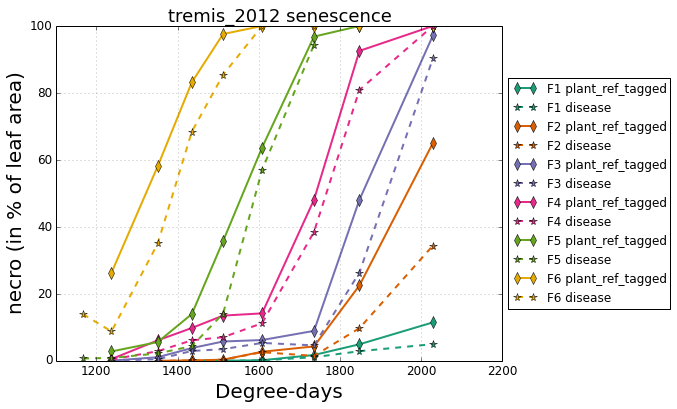

In [6]:
# Mean by leaf: comparison between data_plant from ref_tagged plants with data_disease
compare_plot_by_leaf_two_datasets(data_ref_tagged, data_disease, weather, variable='necro', xaxis = 'degree_days',
                                        leaves = range(1,7), labels = ['plant_ref_tagged', 'disease'],
                                        xlims = [1100, 2200], title_suffix=' senescence')

The delta is clear between the values of total necrosis from data_plant and the values of apical necrosis from data_disease.

--> Use data_disease to calibrate the model of apical senescence /!\

## Senescence of plants with different Final Leaf Numbers (FNL)

In [7]:
# Get data from disease measurements in 2012 and 2013
data_2012 = data_disease
weather_2012 = weather
data_2013, weather_2013 = data_reader(year = 2013, variety = 'Tremie13', from_file = 'reference',
                                  wetness_duration_min = 10., temp_min = 0., temp_max = 25.)

In [8]:
# Repartition of plants with various FNL
compare_contingency_by_fnl(data_2012, weather_2012, variable = 'necro')

FNL 12                    / FNL 13                      \
                            1  2  3  4  5  6  7  /      1   2   3   4   5   6   
Date       Degree days                                                          
2012-04-03 1167             -  -  -  3  3  3  -  /      -   -   -   -  26  25   
2012-04-11 1237             -  -  3  3  3  1  2  /      -   -  20  27  26  24   
2012-04-26 1351             -  3  3  2  3  -  -  /      -  19  27  27  27  25   
2012-05-03 1435             3  3  3  3  2  -  -  /     20  27  27  23  27  16   
2012-05-09 1512             3  3  2  3  -  3  -  /     27  27  25  21  25  21   
2012-05-16 1608             3  3  3  3  3  -  -  /     27  27  27  24  26  14   
2012-05-25 1736             3  3  2  3  3  -  -  /     27  27  26  22  27  27   
2012-05-31 1848             3  3  3  -  -  -  -  /     27  27  27  22   -   -   
2012-06-12 2029             3  3  3  -  -  -  -  /     27  27  27  26   -   -   

                            /  
                         7  /  
Date       Degree days         
2012-04-03 1167         27  /  
2012-04-11 1237         23  /  
2012-04-26 1351         12  /  
2012-05-03 1435          -  /  
2012-05-09 1512          -  /  
2012-05-16 1608          -  /  
2012-05-25 1736          -  /  
2012-05-31 1848          -  /  
2012-06-12 2029          -  /

In [9]:
compare_contingency_by_fnl(data_2013, weather_2013, variable = 'necro')

FNL 11              /  FNL 12                  /
                             1   2   3   4  /       1   2   3   4   5  /
Date       Degree days                                                  
2013-05-22 1281             32  32  32  32  /      13  13  13  12  12  /
2013-05-27 1325             32  32  32  32  /      13  13  13  13  13  /
2013-06-03 1411             32  32  32  32  /      13  13  13  13  13  /
2013-06-11 1542             32  32  32  32  /      12  13  13  13  13  /
2013-06-17 1635             32  32  32  32  /      13  13  13  13  13  /
2013-06-24 1759             32  32  32  32  /      12  12  11  12  12  /
2013-07-02 1880             32  32  32  32  /      12  12  12  12  12  /
2013-07-08 1995             31  31  31  31  /      12  12  12  12  12  /
2013-07-15 2135             31  31  31  31  /      12  12  12  12  12  /

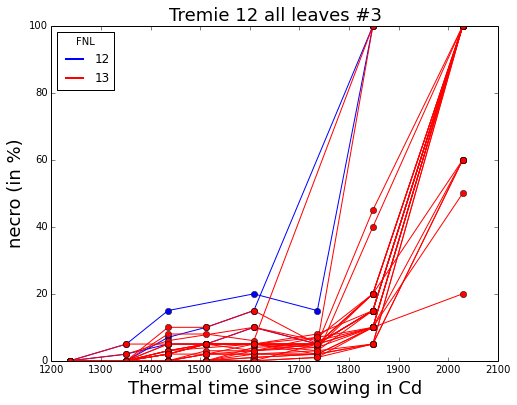

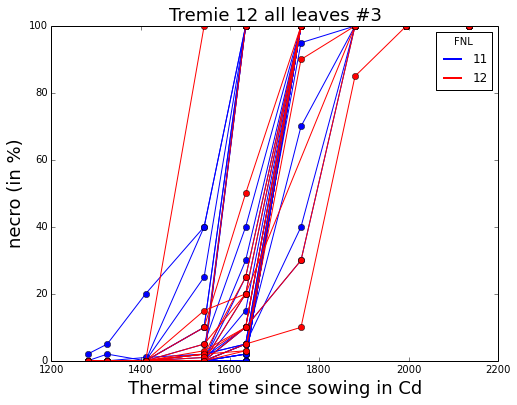

In [10]:
# Example with all samples from one leaf layer (2012 above, 2013 below)
leaf = 3
plot_by_leaf_samples_by_fnl(data_2012, weather_2012, variable = 'necro', leaf = leaf, xaxis = 'degree_days', marker='o')
plot_by_leaf_samples_by_fnl(data_2013, weather_2013, variable = 'necro', leaf = leaf, xaxis = 'degree_days', marker='o')

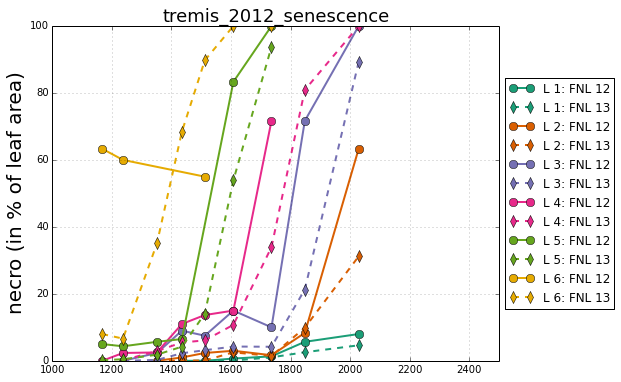

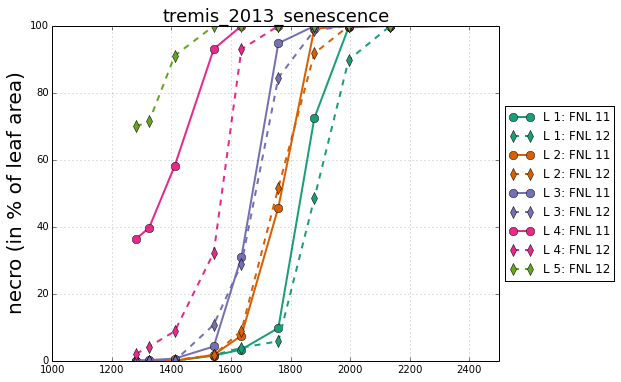

In [11]:
# Mean by leaf in age since sowing (2012 above, 2013 below)
plot_by_leaf_by_fnl(data_2012, weather_2012, variable = 'necro', title_suffix='_senescence',
                     xaxis = 'degree_days', xlims = [1000, 2500], minimum_sample_size = 0)
plot_by_leaf_by_fnl(data_2013, weather_2013, variable = 'necro', title_suffix='_senescence',
                     xaxis = 'degree_days', xlims = [1000, 2500], minimum_sample_size = 0)

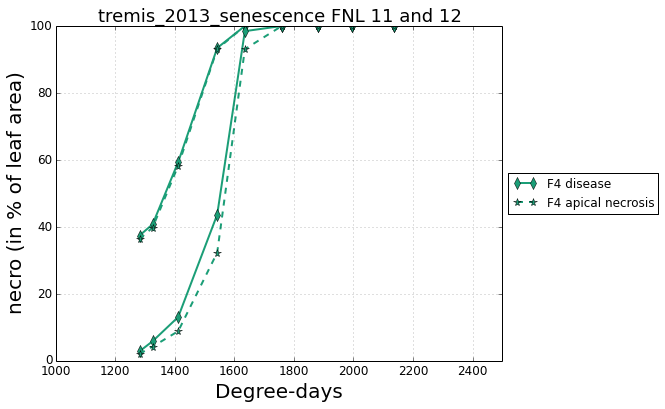

In [12]:
# Only leaf 4 for both FNL in 2013
data_g = group_by_fnl(data_2013)
fig, ax = plt.subplots(1, figsize = (8,6))
compare_plot_by_leaf_two_variables(data_g[11], weather_2013, leaves = [4], variable1 = 'severity', 
                                   variable2 = 'necro', title_suffix='_senescence FNL 11 and 12',
                                   labels = ['disease', 'apical necrosis'],
                                   xaxis = 'degree_days', xlims = [1000, 2500], minimum_sample_size = 0, ax = ax)
compare_plot_by_leaf_two_variables(data_g[12], weather_2013, leaves = [4], variable1 = 'severity', 
                                   variable2 = 'necro', title_suffix='_senescence FNL 11 and 12',
                                   labels = ['disease', 'apical necrosis'],
                                   xaxis = 'degree_days', xlims = [1000, 2500], minimum_sample_size = 0, ax = ax)

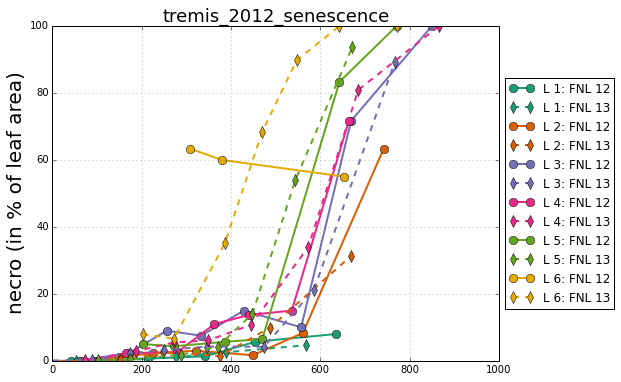

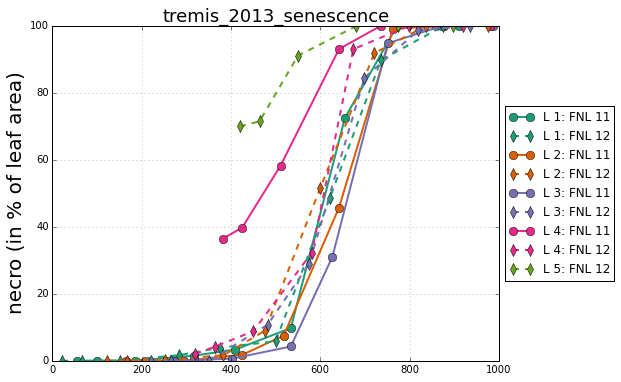

In [13]:
# Mean by leaf in age since lingulation (2012 above, 2013 below)
plot_by_leaf_by_fnl(data_2012, weather_2012, variable = 'necro', title_suffix='_senescence',
                     xaxis = 'age_leaf_lig', xlims = [0, 1000], minimum_sample_size = 0)
plot_by_leaf_by_fnl(data_2013, weather_2013, variable = 'necro', title_suffix='_senescence',
                     xaxis = 'age_leaf_lig', xlims = [0, 1000], minimum_sample_size = 0)

Calage top en age, il faut savoir l'arreter a un temps donné F5 sur NFF12/13 n'est plus du haut (i.e. duree de vie verte egale en age ddays)

Decrochage F4 en 2013 trop precoce : possible biais maladie